# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$L(w) = \dfrac{1}{N}\sum_{i=1}^{N} \widehat L_i (w, x_i, y_i), $$ где

$$ \widehat L_i(w, x_i, y_i) = (y_i - a_i) ^ 2  + \dfrac{1}{C} R(w)$$

Общая формула для обновления весов (мини-батч размера $n$, состоящий из подвыборки с индексами $i_1, \ldots, i_n$):

$$w_{new} = w_{old} - \alpha \dfrac{1}{n} \sum_{k=1}^{n} \nabla_w \widehat L_{i_k}(w_{old}, x_{i_k}, y_{i_k}) .$$

Легко видеть, что 

$$ \dfrac{\partial \widehat L_{i_k}}{\partial w_j} = - 2 \, (y_{i_k} - a_{i_k}) \, x_{i_k}^j + \dfrac{1}{C} \dfrac{\partial R}{\partial w_j},$$

или в векторном виде:

$$\nabla_w \widehat L_{i_k} = - 2 \, (y_{i_k} - a_{i_k}) x_{i_k} +  \dfrac{1}{C} \nabla_w R.$$

Следовательно, 

$$ w_{new} = w_{old} + 2\alpha \dfrac{1}{n} \sum_{k=1}^{n}  (y_{i_k} - a_{i_k}) x_{i_k} -  \alpha \dfrac{1}{C} \nabla_w R .$$

#### Проанализируем формулу без учета регуляризации:
#### Если $a_{i_k} < y_{i_k}$ (ответ слишком маленький), то происходит сдвиг весов в направлении $x_{i_k}$. Если $a_{i_k} > y_{i_k}$ (ответ слишком большой), то происходит сдвиг весов в направлении, противоположном $x_{i_k}$. Если $a_{i_k} > y_{i_k}$ (правильный ответ), то сдвига нет.

При $R(w) =  \sum_{j=0}^{D}w_j^2 :$

$$ w_{new} = w_{old} + 2\alpha \dfrac{1}{n} \sum_{k=1}^{n}  (y_{i_k} - a_{i_k}) x_{i_k} -  \dfrac{2 \alpha}{C} w_{old}  $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$L(w) = \dfrac{1}{N}\sum_{i=1}^{N} \widehat L_i (w, x_i, y_i), $$ где

$$ \widehat L_i(w, x_i, y_i) = - \Big( y_i \log a_i + (1 - y_i) \log (1 - a_i) \Big) + \dfrac{1}{C} R(w)$$

Общая формула для обновления весов (мини-батч размера $n$, состоящий из подвыборки с индексами $i_1, \ldots, i_n$):

$$w_{new} = w_{old} - \alpha \dfrac{1}{n} \sum_{k=1}^{n} \nabla_w \widehat L_{i_k}(w_{old}, x_{i_k}, y_{i_k}) $$

Найдем $ \dfrac{\partial \widehat L_{i_k}}{\partial w_j}.$
Заметим, что

$$\dfrac{ \partial \sigma (t)}{ \partial t}  = \sigma(t) \big( 1-\sigma(t) \big).$$

Используя этот факт, установим равенство 

$$ \dfrac{\partial a_{i_k}}{\partial w_j} = a_i (1-a_i) \, x_{i_k}^j.$$

Тогда 

$$ \dfrac{\partial \widehat L_{i_k}}{\partial w_j} = -(y_{i_k} - a_{i_k}) \, x_{i_k}^j  + \dfrac{1}{C} \cdot \dfrac{\partial R}{\partial w_j}$$

или в векторном виде:

$$ \nabla_w \widehat L_{i_k} = - (y_{i_k} - a_{i_k}) \, x_{i_k} + \dfrac{1}{C} \nabla_w R .$$

При $R(w) =  \sum_{j=0}^{D}w_j^2 :$


$$ \nabla_w \widehat L_{i_k} = - (y_{i_k} - a_{i_k}) \, x_{i_k} + \dfrac{2}{C} \cdot w .$$

Итого,


$$w_{new} = w_{old} + \alpha \dfrac{1}{n} \sum_{k=1}^{n} (y_{i_k} - a_{i_k}) \, x_{i_k}  - \dfrac{2 \alpha }{C} \cdot w_{old} $$

#### Анализ формулы без учета регуляризации дает примерно то же самое, что в случае линейной регрессии, только разность $(y_{i_k} - a_{i_k})$ может принимать только значения из $[-1, 1]$.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

1) $$Q(w) = \dfrac{1}{N} \sum_{i=1}^{N} \big(\langle x_i, w \rangle - y_i\big)^2,$$
поэтому 
$$\dfrac{\partial Q}{\partial w_k} =  \dfrac{2}{N} \sum_{i=1}^{N} \big(\langle x_i, w \rangle - y_i\big) \, x_i^k, $$
и
$$ \dfrac{\partial ^2 Q}{ \partial w_k \partial w_j } = \dfrac{2}{N} \sum_{i=1}^N x_i^j x_i^k = \dfrac{2}{N} \langle x^k, x^j\rangle,$$
где $x^j$ - $j$-тый столбец матрицы X.

То есть $\nabla \nabla Q = \mathfrak{G} (x^1, \ldots, x^D)$ - матрица Грама векторов-столбцов матрицы X.

Если в матрице X строк не меньше, чем столбцов, и она имеет полный ранг (равный количеству столбцов), то столбцы матрицы X линейно независимы, и, следовательно, $\mathfrak{G} (x^1, \ldots, x^D) > 0$.


2) Точное решение выглядит следующим образом:

$$ w = \big( X^T X + \dfrac{N}{C} E \big) ^{-1} X^T y.$$

Поскольку $\det \big( X^T X + \dfrac{N}{C} E \big) = 0$ тогда и только тогда, когда $\big(- \dfrac{N}{C} \big)$ является собственным значением матрицы $X^TX$ (а их конечное число), можно подобрать такое $C$ (например, "достаточно малое"), при котором матрица будет обратима $X^T X + \dfrac{N}{C} E$, а нам как раз этого хочется.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

Итак, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

Рассмотрим функцию $F_p(t) = -p \log t - (1-p) log(1-t)$ и найдем ее точку минимума.

$$F_p ' (t) = - \dfrac{p}{t} + \dfrac{1-p}{1-t} = \dfrac{-p(1-t) + (1-p)t}{t(1-t)} = \dfrac{t-p}{t(1-t)}.$$
 
$$ F_p ''(t) = \dfrac{t(1-t) + 2t(t-p)}{t^2 (1-t)^2} = \dfrac{t(1-t) + 2t(t-p)}{t^2 (1-t)^2} = \dfrac{(t + 1-2p)}{t (1-t)^2}.$$

Мы видим, что $F_p ' (t) = 0$ при $t=p$, при этом $F_p ''(p) = \dfrac{1}{p\,(1-p)} > 0$ при $p \in (0,1)$.

Если подставить $a(x_i)$ вместо $t$ и $p(y_i = 1 | x_i)$ вместо $p$, то задача решена.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Я бы, конечно, предпочла его использовать, потому что в противном случае формулы для градиентного спуска для нулевой координаты будут отличаться от остальных.

По крайней мере я не вижу ничего плохого в том, чтобы его использовать (он от этого не становится тождественным или т.п. ужасные вещи)

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [5]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [6]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [338]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """   
    if shuffle:
        Z = np.column_stack((X, y))

        Z = np.asarray(sorted(Z, key=lambda *args: random.random()))

        y = Z[:, -1]
        X = Z[:, :-1]
    
    n_iter = y.size // batch_size
    if y.size % batch_size != 0:
        n_iter += 1
    for i in range(n_iter):
        X_batch = X[i * batch_size : (i+1) * batch_size, :]
        y_batch = y[i * batch_size : (i+1) * batch_size]
        yield (X_batch, y_batch.reshape(-1, 1))

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [228]:
a = np.asarray([1, 2, -2, 1])
print(np.sign(a))

[ 1  1 -1  1]


In [340]:
#%%pycodestyle

import math

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + math.exp(-x))
    
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
        
    def a(self, X):
        """
        Считаем, что к X добавлен фиктивный столбец (тождественно равный 1)
        и вектор весов w_0, w_1, ..., w_D
        """
        X_dot_w = X.dot(self.w)  # NxD * Dx1 = Nx1
        if self.model_type == 'lin_reg':
            a_ = X_dot_w
        else:
            a_ = np.vectorize(sigmoid)(X_dot_w)
            
        return a_
        
    def R2_w(self):
        return np.linalg.norm(self.w)
    
    def R2_w_grad(self):
        return 2*self.w
    
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        L = 0
        n = y_batch.size
        
        a_ = self.a(X_batch)
        
        if self.model_type == 'lin_reg':
            for i in range(n):
                L += (y_batch[i] - a_[i]) ** 2
            L /= n
            L += (1/self.C) * self.R2_w()
        else:
            for i in range(n):
                L += y_batch[i] * math.log(a_[i]) + (1 - y_batch[i]) * math.log(1 - a_[i])
            L /= n
            L += (1/self.C) * self.R2_w()
                
        return L
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n = y_batch.size
        
        if self.model_type == 'lin_reg':
            L_grad = (-2/n) * np.apply_along_axis(sum, 0, (y_batch - self.a(X_batch))*X_batch).reshape(-1, 1) 
            + (1/self.C) * self.R2_w_grad()
        else:
            L_grad = (-1/n) * np.apply_along_axis(sum, 0, (y_batch - self.a(X_batch))*X_batch).reshape(-1, 1) 
            + (1/self.C) * self.R2_w_grad()
            
        return L_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.w -= self.alpha*new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        y = y.reshape(-1, 1)
        X = np.column_stack([[1]*X.shape[0], X])  # добавляем фиктивный столбец
            
        self.w = np.random.sample(X.shape[1]).reshape(-1, 1)  # w_0 уже там
        
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            return sign(a(X))
        else:
            return sign(a(X) - 0.5)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [307]:
def plot_decision_boundary(clf):
    """
    Считаем, что clf.fit() вызвано заранее
    """
    print(clf.w)
    c, a, b, *rest = clf.w
    # a*x1 + b*x2 + c = 0
    if abs(a) > 1e-7:
        # x1 = -b/a * x2 - c/a
        def x1(x2):
            return -b/a * x2 - c/a
            
        x2_ = np.linspace(-5, 7, 5)
        x1_ = np.asarray([x1(x2) for x2 in x2_])
    elif abs(b) > 1e-7:
        # x2 = -a/b * x2 - c/b
        def x2(x1):
            return -a/b * x1 - c/b
            
        x1_ = np.linspace(-5, 7, 5)
        x2_ = np.asarray([x2(x1) for x1 in x1_])
    else:
        x1_=None
        x2_=None
    plt.plot(x1_, x2_)
    

[[-4.61674277]
 [ 1.00218718]
 [-1.13578079]]


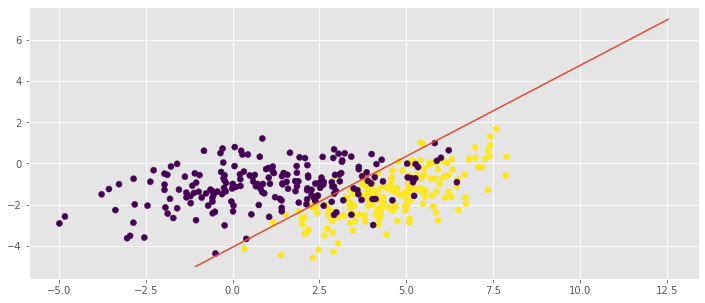

In [308]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])

C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_model = MySGDClassifier(batch_generator, C=0.1, alpha=0.01, max_epoch=30, model_type='log_reg')
my_model.fit(X, y)

plot_decision_boundary(my_model)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [309]:
from sklearn.datasets import make_classification

In [321]:
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [322]:
from functools import partial

In [355]:
clf = MySGDClassifier(partial(batch_generator, batch_size=100), C=0.1, alpha=0.1, max_epoch=30, model_type='log_reg')

clf.fit(X, y)
print(clf.errors_log['loss'][:10])
print(clf.errors_log['loss'][-10:])

[array([17.79538794]), array([17.45079377]), array([17.20925631]), array([17.12885953]), array([16.81544899]), array([16.34397904]), array([16.22291203]), array([16.15186527]), array([16.02859897]), array([15.76782448])]
[array([24.710086]), array([24.82901991]), array([24.88378875]), array([24.90873309]), array([24.92462266]), array([24.88016717]), array([24.86822913]), array([24.96941789]), array([25.00302261]), array([25.02536824])]


Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [129]:
## Your Code Here

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [4]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [5]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [6]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [10]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***